In [2]:
import numpy as np
import pandas as pd
#import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import copy 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
"""
#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
"""
#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

In [552]:

data = pd.io.stata.read_stata('Base imputada EFH 2021.dta')
data.to_csv('my_stata_file2021.csv')

In [347]:

# load dataset
dataset = pd.read_csv('my_stata_file2021.csv')

In [553]:

# load dataset
dataset = pd.read_csv('my_stata_file2021.csv')

In [554]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [555]:
type(dataset)

pandas.core.frame.DataFrame

In [556]:
dataset.shape

(136400, 127)

In [557]:
dataset.head()

,Unnamed: 0,imp,id,factor,genero_ent,edad_ent,tr_edad_ent,nacionalidad_ent,educ_ent,neduc_ent,...,u_tnbco,u_prepago,u_cheq,u_pat,u_transf,u_bip,u_tcripto,u_pel,u_tprepago,u_pac
0,0,0.0,10002.0,2356.0,Mujer,37,entre 35 y 49,Chileno(a),12.0,Ed. Básica,...,No,No,No,No,Si,No,No,Si,No,No
1,1,0.0,10003.0,1232.0,Hombre,76,igual o mayor a 65,Chileno(a),12.0,Ed. Básica,...,No,Si,No,Si,No,No,No,Si,No,No
2,2,0.0,10004.0,1927.0,Hombre,69,igual o mayor a 65,Chileno(a),6.0,Ed. diferencial,...,No,No,No,No,Si,No,No,No,No,No
3,3,0.0,10005.0,2573.0,Mujer,45,entre 35 y 49,Chileno(a),12.0,Ed. Básica,...,No,No,No,No,Si,Si,No,Si,No,No
4,4,0.0,10006.0,1796.0,Hombre,60,entre 50 y 64,Peruano(a),9.0,Ed. Básica,...,No,No,No,No,No,Si,No,No,Si,No


In [559]:
for i,value in enumerate(dataset['neduc_ent']):
 if   value == "Sin educación":
           dataset['neduc_ent'][i] = 0.0
 elif value == "Ed. diferencial":
           dataset['neduc_ent'][i]= 1.0
 elif value == "Ed. Básica":
           dataset['neduc_ent'][i]= 2.0
 elif value == "Ed. Media":
           dataset['neduc_ent'][i]= 3.0
 elif value == "CFT o IP":
           dataset['neduc_ent'][i]= 4.0
 elif value == "Universitaria":
           dataset['neduc_ent'][i]= 5.0
 elif value == "Postgrado":
           dataset['neduc_ent'][i]= 6.0

In [560]:
for i,value in enumerate(dataset['neduc_ent']):
 if   value == "Sin educación":
           dataset['neduc_ent'][i] = 0.0
 elif value == "Ed. diferencial":
           dataset['neduc_ent'][i]= 1.0
 elif value == "Básica":
           dataset['neduc_ent'][i]= 2.0
 elif value == "Media":
           dataset['neduc_ent'][i]= 3.0
 elif value == "CFT o IP":
           dataset['neduc_ent'][i]= 4.0
 elif value == "Universitaria":
           dataset['neduc_ent'][i]= 5.0
 elif value == "Postgrado":
           dataset['neduc_ent'][i]= 6.0

In [561]:
for i,value in enumerate(dataset['tr_numh']):
 if   value == "7 o más personas en el hogar":
           dataset['tr_numh'][i] = 4.0
 elif value == "entre 1 y 2 personas en el hogar":
           dataset['tr_numh'][i]= 1.0
 elif value == "entre 3 y 4 personas en el hogar":
           dataset['tr_numh'][i]= 2.0
 elif value == "entre 5 y 6 personas en el hogar":
           dataset['tr_numh'][i]= 3.0
 elif value == "más de 6 personas en el hogar":
           dataset['tr_numh'][i]= 4.0


In [562]:
for i,value in enumerate(dataset['est_civil_ent']):
 if   value == "Casado(a)":
           dataset['est_civil_ent'][i] = 1.0
 elif value == "Conviviente o pareja":
           dataset['est_civil_ent'][i]= 2.0
 elif value == "Conviviente o pareja sin acuerdo de unión civil":
           dataset['est_civil_ent'][i]= 2.0       
 elif value == "Conviviente civil (con acuerdo)":
           dataset['est_civil_ent'][i]= 2.0        
 elif value == "Anulado":
           dataset['est_civil_ent'][i]= 3.0
 elif value == "Anulado(a)":
           dataset['est_civil_ent'][i]= 3.0
 elif value == "Separado(a)":
           dataset['est_civil_ent'][i]= 4.0
 elif value == "Separado(a) de union de hecho":
           dataset['est_civil_ent'][i]= 4.0
 elif value == "Separado(a) de union legal":
           dataset['est_civil_ent'][i]= 4.0
 elif value == "Viudo(a)":
           dataset['est_civil_ent'][i]= 5.0
 elif value == "Soltero(a)":
           dataset['est_civil_ent'][i]= 6.0
 elif value == "Divorciado(a)":
           dataset['est_civil_ent'][i]= 7.0
        
        

In [563]:
for i,value in enumerate(dataset['ocup_ent']):
 if   value == "Desocupado":
           dataset['ocup_ent'][i] = 0.0
 elif value == "Ocupado":
           dataset['ocup_ent'][i]= 1.0
 

In [565]:
for i,value in enumerate(dataset["estrato"]):
    dataset["estrato"][i] = int(value.split("Deciles")[1].split("al")[0])

In [566]:
set(dataset['estrato'])

{1, 6, 9}

Compute the Risky asset and the riskless assets for all the individuals in the survey data. Risky and riskless assets are defined as follows:
Risky assets is investments in mutual funds, stocks, bonds, commodities, and real estate, and an estimate of human capital.
Risk Free Assets: checking and savings balances,certificates of deposit, and other cash balances and equivalents.

According to the glossary: risky = act_var, risk free= act_fijo + act_ahcta . (we could to these add the category of "activos reales" ?? the quantity "ahorros" = t_habah, habah_m and habah_f should definetely be part of the learning, this is an indication of how the family raises money)

the value equivalent to KIDS is in my opion "numh", AGE is "edad_pr", EDUC is "neduc_pr" (we take "educ_pr" as this is a number) , married is "est_civil_pr", OCCU is "ocup_pr", INCOME is "estrato", NETWORTH is "act_toth", RISK isnt really there. 

In [567]:
keep_list2 = ['estrato','rci_dt','tr_numh','edad_ent','neduc_ent','est_civil_ent','ocup_ent','act_ahcta','act_fin','act_finvar','act_finfija','act_toth']

drop_list2 = [col for col in dataset.columns if col not in keep_list2]

dataset.drop(labels=drop_list2, axis=1, inplace=True)

In [568]:
dataset.head()

,edad_ent,neduc_ent,est_civil_ent,ocup_ent,estrato,tr_numh,act_fin,act_ahcta,act_toth,rci_dt
0,37,2.0,1.0,1.0,6,3.0,2160000.0,0.0,NaN,0.655405
1,76,2.0,1.0,0.0,1,1.0,NaN,0.0,NaN,0.000000
2,69,1.0,1.0,0.0,1,2.0,0.0,0.0,62000000.0,0.000000
3,45,2.0,1.0,1.0,6,3.0,0.0,0.0,92500000.0,0.000000
4,60,2.0,6.0,1.0,1,3.0,0.0,0.0,80000000.0,0.000000


In [569]:
set(dataset['neduc_ent'])

{nan, 1.0, 2.0, 3.0, 4.0, 5.0}

In [570]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [571]:
# Drop the rows containing NA
dataset=dataset.dropna(axis=0)

dataset=dataset[~dataset.isin([np.nan, np.inf, -np.inf]).any(1)]

#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [572]:
dataset.head()

,edad_ent,neduc_ent,est_civil_ent,ocup_ent,estrato,tr_numh,act_fin,act_ahcta,act_toth,rci_dt
2,69,1.0,1.0,0.0,1,2.0,0.0,0.0,62000000.0,0.000000
3,45,2.0,1.0,1.0,6,3.0,0.0,0.0,92500000.0,0.000000
4,60,2.0,6.0,1.0,1,3.0,0.0,0.0,80000000.0,0.000000
5,74,1.0,6.0,0.0,1,1.0,0.0,90000.0,165540000.0,0.074697
6,65,1.0,4.0,0.0,1,1.0,0.0,0.0,40000000.0,0.000000


In [573]:

#Risk Tolerance 

#USAR ESTO PARA DATOS DE 2017 dataset['act_fin'] = dataset['act_finvar']+dataset['act_finfija']
dataset['RT'] = dataset['act_fin']/(dataset['act_ahcta']+dataset['act_fin'])

In [574]:
dataset.head()

,edad_ent,neduc_ent,est_civil_ent,ocup_ent,estrato,tr_numh,act_fin,act_ahcta,act_toth,rci_dt,RT
2,69,1.0,1.0,0.0,1,2.0,0.0,0.0,62000000.0,0.000000,NaN
3,45,2.0,1.0,1.0,6,3.0,0.0,0.0,92500000.0,0.000000,NaN
4,60,2.0,6.0,1.0,1,3.0,0.0,0.0,80000000.0,0.000000,NaN
5,74,1.0,6.0,0.0,1,1.0,0.0,90000.0,165540000.0,0.074697,0.0
6,65,1.0,4.0,0.0,1,1.0,0.0,0.0,40000000.0,0.000000,NaN


In [575]:
set(dataset['neduc_ent'])

{1.0, 2.0, 3.0, 4.0, 5.0}

In [576]:
dataset = dataset[dataset['act_fin'] > 100000]  

In [577]:
dataset = dataset[dataset['act_ahcta'] > 100000]  

In [578]:
dataset = dataset[dataset['rci_dt'] > 0] 

In [579]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [580]:
# Drop the rows containing NA
dataset=dataset.dropna(axis=0)

dataset=dataset[~dataset.isin([np.nan, np.inf, -np.inf]).any(1)]

#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [581]:
dataset.head()

,edad_ent,neduc_ent,est_civil_ent,ocup_ent,estrato,tr_numh,act_fin,act_ahcta,act_toth,rci_dt,RT
7,43,4.0,1.0,1.0,9,3.0,600000.0,30000000.0,3.456273e+08,0.249307,0.019608
17,50,4.0,6.0,1.0,9,2.0,3000000.0,400000.0,3.034000e+08,2.686299,0.882353
23,53,3.0,2.0,1.0,9,1.0,31000000.0,3000000.0,1.943485e+08,0.182609,0.911765
29,37,4.0,1.0,1.0,9,2.0,4600000.0,500000.0,1.269440e+08,0.059524,0.901961
37,44,4.0,1.0,1.0,9,2.0,6400000.0,5000000.0,3.874000e+08,0.381481,0.561404


In [582]:
datasetoriginal=dataset.copy()

In [583]:
dataset = dataset.reset_index()

In [584]:
dataset = dataset.drop(columns=['index'])

In [585]:
dataset.head()

,edad_ent,neduc_ent,est_civil_ent,ocup_ent,estrato,tr_numh,act_fin,act_ahcta,act_toth,rci_dt,RT
0,43,4.0,1.0,1.0,9,3.0,600000.0,30000000.0,3.456273e+08,0.249307,0.019608
1,50,4.0,6.0,1.0,9,2.0,3000000.0,400000.0,3.034000e+08,2.686299,0.882353
2,53,3.0,2.0,1.0,9,1.0,31000000.0,3000000.0,1.943485e+08,0.182609,0.911765
3,37,4.0,1.0,1.0,9,2.0,4600000.0,500000.0,1.269440e+08,0.059524,0.901961
4,44,4.0,1.0,1.0,9,2.0,6400000.0,5000000.0,3.874000e+08,0.381481,0.561404


In [586]:
dataset['neduc_ent'] =dataset['neduc_ent'].astype(float)

In [587]:
dataset['est_civil_ent'] =dataset['est_civil_ent'].astype(float)

In [588]:
dataset['ocup_ent'] =dataset['ocup_ent'].astype(float)

In [589]:
dataset['tr_numh'] =dataset['tr_numh'].astype(float)

<AxesSubplot:title={'center':'Correlation Matrix'}>

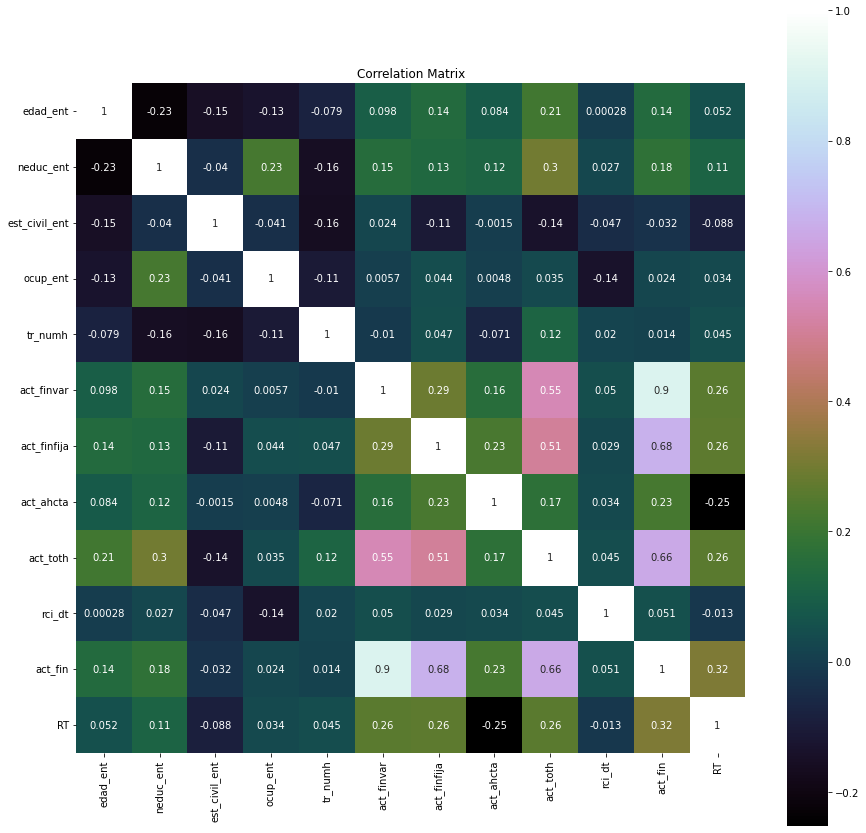

In [532]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [590]:
correlation

,edad_ent,neduc_ent,est_civil_ent,ocup_ent,tr_numh,act_finvar,act_finfija,act_ahcta,act_toth,rci_dt,act_fin,RT
edad_ent,1.000000,-0.228196,-0.154180,-0.132615,-0.079306,0.098231,0.141256,0.083602,0.212726,0.000276,0.139984,0.052013
neduc_ent,-0.228196,1.000000,-0.040428,0.225315,-0.156977,0.152251,0.132621,0.115040,0.300512,0.027445,0.177488,0.111379
est_civil_ent,-0.154180,-0.040428,1.000000,-0.040680,-0.163377,0.024011,-0.109921,-0.001523,-0.137326,-0.047363,-0.031847,-0.088041
ocup_ent,-0.132615,0.225315,-0.040680,1.000000,-0.107315,0.005654,0.043739,0.004818,0.035225,-0.137131,0.024343,0.033951
tr_numh,-0.079306,-0.156977,-0.163377,-0.107315,1.000000,-0.010189,0.046735,-0.070996,0.117257,0.019661,0.013555,0.045175
act_finvar,0.098231,0.152251,0.024011,0.005654,-0.010189,1.000000,0.287726,0.157958,0.554522,0.049791,0.898973,0.259696
act_finfija,0.141256,0.132621,-0.109921,0.043739,0.046735,0.287726,1.000000,0.230564,0.507870,0.028861,0.678141,0.263733
act_ahcta,0.083602,0.115040,-0.001523,0.004818,-0.070996,0.157958,0.230564,1.000000,0.168534,0.034325,0.226661,-0.252116
act_toth,0.212726,0.300512,-0.137326,0.035225,0.117257,0.554522,0.507870,0.168534,1.000000,0.045107,0.657802,0.258571
rci_dt,0.000276,0.027445,-0.047363,-0.137131,0.019661,0.049791,0.028861,0.034325,0.045107,1.000000,0.051408,-0.012726


In [591]:
dataset.columns

Index(['edad_ent', 'neduc_ent', 'est_civil_ent', 'ocup_ent', 'estrato',
       'tr_numh', 'act_fin', 'act_ahcta', 'act_toth', 'rci_dt', 'RT'],
      dtype='object')

In [592]:
# split out validation dataset for the end
Y= dataset['RT']
#X = dataset[['edad_ent', 'neduc_ent', 'ocup_ent','est_civil_ent','estrato','act_toth', 'tr_numh','rci_dt']]
X = dataset.loc[:, dataset.columns != 'RT']

In [593]:
X = X.loc[:, X.columns != 'act_ahcta']

In [594]:
X = X.loc[:, X.columns != 'act_fin']

In [595]:
X = X.loc[:, X.columns != 'act_finvar']

In [596]:
X = X.loc[:, X.columns != 'act_finfija']

In [597]:
X.head()

,edad_ent,neduc_ent,est_civil_ent,ocup_ent,estrato,tr_numh,act_toth,rci_dt
0,43,4.0,1.0,1.0,9,3.0,3.456273e+08,0.249307
1,50,4.0,6.0,1.0,9,2.0,3.034000e+08,2.686299
2,53,3.0,2.0,1.0,9,1.0,1.943485e+08,0.182609
3,37,4.0,1.0,1.0,9,2.0,1.269440e+08,0.059524
4,44,4.0,1.0,1.0,9,2.0,3.874000e+08,0.381481


In [598]:
X.count()

edad_ent         11709
neduc_ent        11709
est_civil_ent    11709
ocup_ent         11709
estrato          11709
tr_numh          11709
act_toth         11709
rci_dt           11709
dtype: int64

In [599]:
# scaler = StandardScaler().fit(X)
# rescaledX = scaler.transform(X)
validation_size = 0.2
seed = 3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [600]:
# test options for regression
num_folds = 10
#scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
scoring = 'r2'

In [601]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
#models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
#models.append(('MLP', MLPRegressor()))
#Ensable Models 
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [602]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    #converted mean square error to positive. The lower the beter
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.068383 (0.012837)
LASSO: 0.040514 (0.005901)
EN: 0.040651 (0.005882)
KNN: 0.782782 (0.024768)
SVR: 0.041042 (0.025680)
ABR: 0.118431 (0.026416)
GBR: 0.533776 (0.016915)
RFR: 0.915302 (0.013264)
ETR: 0.920147 (0.015499)


In [603]:
'''
n_estimators : integer, optional (default=10)
        The number of trees in the forest.
'''
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, \
      cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.916980 using {'n_estimators': 200}


In [551]:
'''
n_estimators : integer, optional (default=10)
        The number of trees in the forest.
'''
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, \
      cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.881140 using {'n_estimators': 350}


In [548]:
models[7][1].fit(X_train, Y_train)

RandomForestRegressor()

In [549]:

y_predict = models[7][1].predict(X_validation)

In [550]:
for y_pred,y_true in zip(Y_validation,y_predict):
    print(y_pred,y_true)

0.8 0.7553144841143622
0.9812280660098316 0.9221506957139657
0.9615384615384616 0.9615384615384626
0.9615384615384616 0.9615384615384626
0.972972972972973 0.972972972972972
0.9814039981403998 0.9814039981403981
0.4 0.32835983512761785
0.625 0.625
0.9944781888459415 0.6686643670265576
0.9615384615384616 0.9615384615384626
0.5789473684210527 0.5789473684210534
0.8333333333333334 0.833333333333333
0.990990990990991 0.9909909909909931
0.8928571428571429 0.798982676537772
0.375 0.375
0.9117647058823529 0.6917650802882988
0.9932279909706546 0.9932279909706533
0.576271186440678 0.5762711864406781
0.9354838709677419 0.5377595872966489
0.9701492537313433 0.8495969768330284
0.7692307692307693 0.769230769230769
0.7560975609756098 0.7560975609756099
0.6818181818181818 0.6818181818181815
0.9615384615384616 0.9615384615384626
0.671727533853098 0.6717275338530994
0.9473684210526315 0.9473684210526304
0.6666666666666666 0.6666666666666659
0.9166666666666666 0.9166666666666674
0.9947229551451188 0.9947